# Content-Based Recommender System

- In this notebook, we will build a content-based recommender system using the Netflix dataset.
- The system will recommend movies similar to a given movie based on their title, director, cast, genre, and description.

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Step 1: Load and preprocess the dataset
We need to load the dataset and preprocess it to ensure it's clean and suitable for building a recommender system. We'll drop missing values in critical columns and combine relevant features for text-based analysis.


In [52]:
movies = pd.read_csv('../Netflix_movies_and_tv_shows_clustering.csv/Netflix_movies_and_tv_shows_clustering.csv')

# Drop rows with missing critical information
movies = movies.dropna(subset=['title', 'description', 'listed_in'])

# Combine relevant columns into a single feature for text analysis
movies['combined_features'] = (
    movies['title'] + ' ' +
    movies['director'].fillna('') + ' ' +
    movies['cast'].fillna('') + ' ' +
    movies['listed_in'].fillna('') + ' ' +
    movies['description']
)

## Step 2: Data Transformation (TF-IDF Vectorization)
To analyze text data, we need to convert it into a numerical format. **TF-IDF (Term Frequency-Inverse Document Frequency)** is a technique that transforms text into a matrix of numerical values based on the importance of words in each document.


In [53]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)

# Apply TF-IDF to the combined features column
tfidf_matrix = vectorizer.fit_transform(movies['combined_features'])

# Print matrix details
print(f'TF-IDF matrix contains {tfidf_matrix.shape[0]} movies and {tfidf_matrix.shape[1]} unique terms')


TF-IDF matrix contains 7787 movies and 23534 unique terms


## Step 3: Compute pairwise cosine similarity
Cosine similarity measures the similarity between two movies based on their TF-IDF vectors. It helps us identify movies with similar content.


In [54]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## Step 4: Define the recommendation function
This function recommends movies based on the cosine similarity scores of their textual features. Users can input a movie title to get recommendations.



In [55]:
def recommend_movies(title, cosine_sim=cosine_sim, movies=movies, top_n=5):
    """
    Recommend movies based on a given title.

    Args:
        title (str): The title of the movie to base recommendations on.
        cosine_sim (array): The precomputed cosine similarity matrix.
        movies (DataFrame): The movies DataFrame.
        top_n (int): Number of recommendations to return.

    Returns:
        DataFrame: A DataFrame of recommended movies with titles and years.
    """
    try:
        # Find the index of the movie
        idx = movies[movies['title'].str.contains(title, case=False, na=False)].index[0]
    except IndexError:
        return "Movie title not found in the dataset."

    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top n most similar movies
    sim_scores = sim_scores[1: top_n + 1]  # Exclude the input movie itself
    movie_indices = [i[0] for i in sim_scores]

    # Return the top n most similar movies
    return movies.iloc[movie_indices][['title', 'release_year']]


## Step 5: Test the recommendation function
You can test the recommendation function by providing a movie title.

In [56]:
# test_movie = "Pokémon the Series"
# test_movie = "Rocky"
# test_movie = "The Matrix"
# test_movie = "AVA"
test_movie = "breaking bad"

print(f"\nRecommendations for '{test_movie}':")
print(recommend_movies(test_movie))



Recommendations for 'breaking bad':
                                title  release_year
858                  Better Call Saul          2018
1945  El Camino: A Breaking Bad Movie          2019
6865                         The Show          2017
7450                   W/ Bob & David          2015
2426                 Girlfriend's Day          2017


## Step 6: Visualize the recommendations
Visualizing recommendations makes it easier to understand the similarity scores of recommended movies. We'll use a bar plot to show the similarity scores.


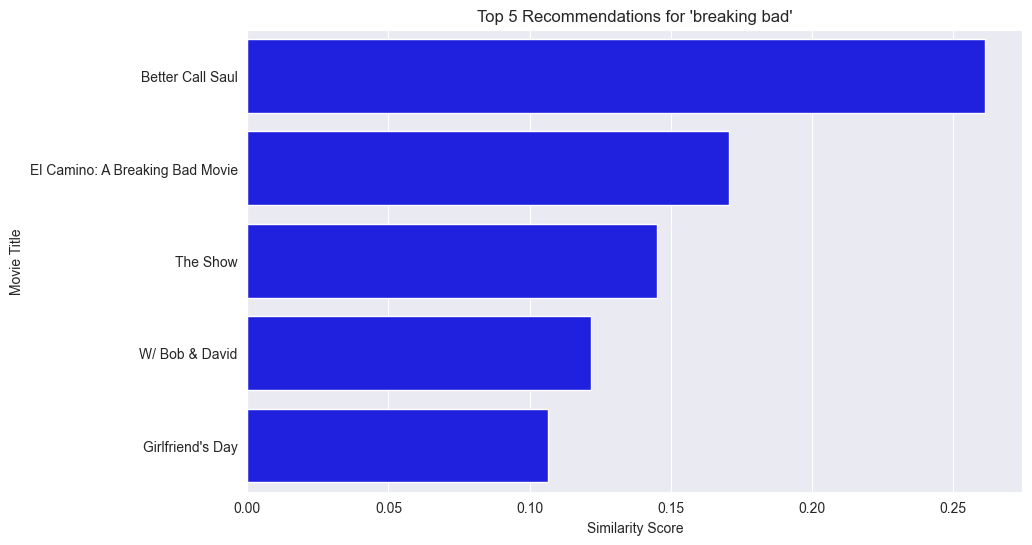

In [57]:
# Step 6: Visualize the recommendations
# ---------------------------------------------------
def visualize_recommendations(title, top_n=5):
    """
    Visualize recommendations as a bar plot.

    Args:
        title (str): The title of the movie to base recommendations on.
        top_n (int): Number of recommendations to visualize.
    """
    recommendations = recommend_movies(title, top_n=top_n)
    if isinstance(recommendations, str):  # If the title is not found
        print(recommendations)
        return

    # Calculate similarity scores
    idx = movies[movies['title'].str.contains(title, case=False, na=False)].index[0]
    recommendations['Similarity'] = [
        cosine_sim[idx, movies.index.get_loc(i)] for i in recommendations.index
    ]

    # Plot the recommendations
    plt.figure(figsize=(10, 6))
    sns.barplot(data=recommendations, x='Similarity', y='title', color='blue')
    plt.title(f"Top {top_n} Recommendations for '{title}'")
    plt.xlabel('Similarity Score')
    plt.ylabel('Movie Title')
    plt.show()

# Test the bar plot visualization
visualize_recommendations(test_movie, top_n=5)


# Conclusion
In this notebook, we have successfully built a content-based recommender system for movies using the Netflix dataset. The system makes use of various textual features, such as the movie title, director, cast, genre, and description, to recommend similar movies based on their content. We employed the TF-IDF (Term Frequency-Inverse Document Frequency) technique to convert these textual features into numerical representations, followed by cosine similarity to calculate how similar each movie is to the input movie.

The system's recommendation function allows users to input a movie title, and it returns a list of the most similar movies based on textual features. The visualization step further enhances the experience by showing similarity scores in an easily interpretable bar plot.

Overall, this content-based recommender system demonstrates how to leverage text analysis techniques to build personalized recommendations in the realm of movie and TV show suggestions. The results provide an effective and scalable approach for recommending content based on the inherent properties of the movies themselves.

### Alperen Doganci
### Emran Hamdard